In [1]:
from preamble import *

# 지도 학습 알고리즘

## K-최근접 이웃

### 최근접 이웃 분류

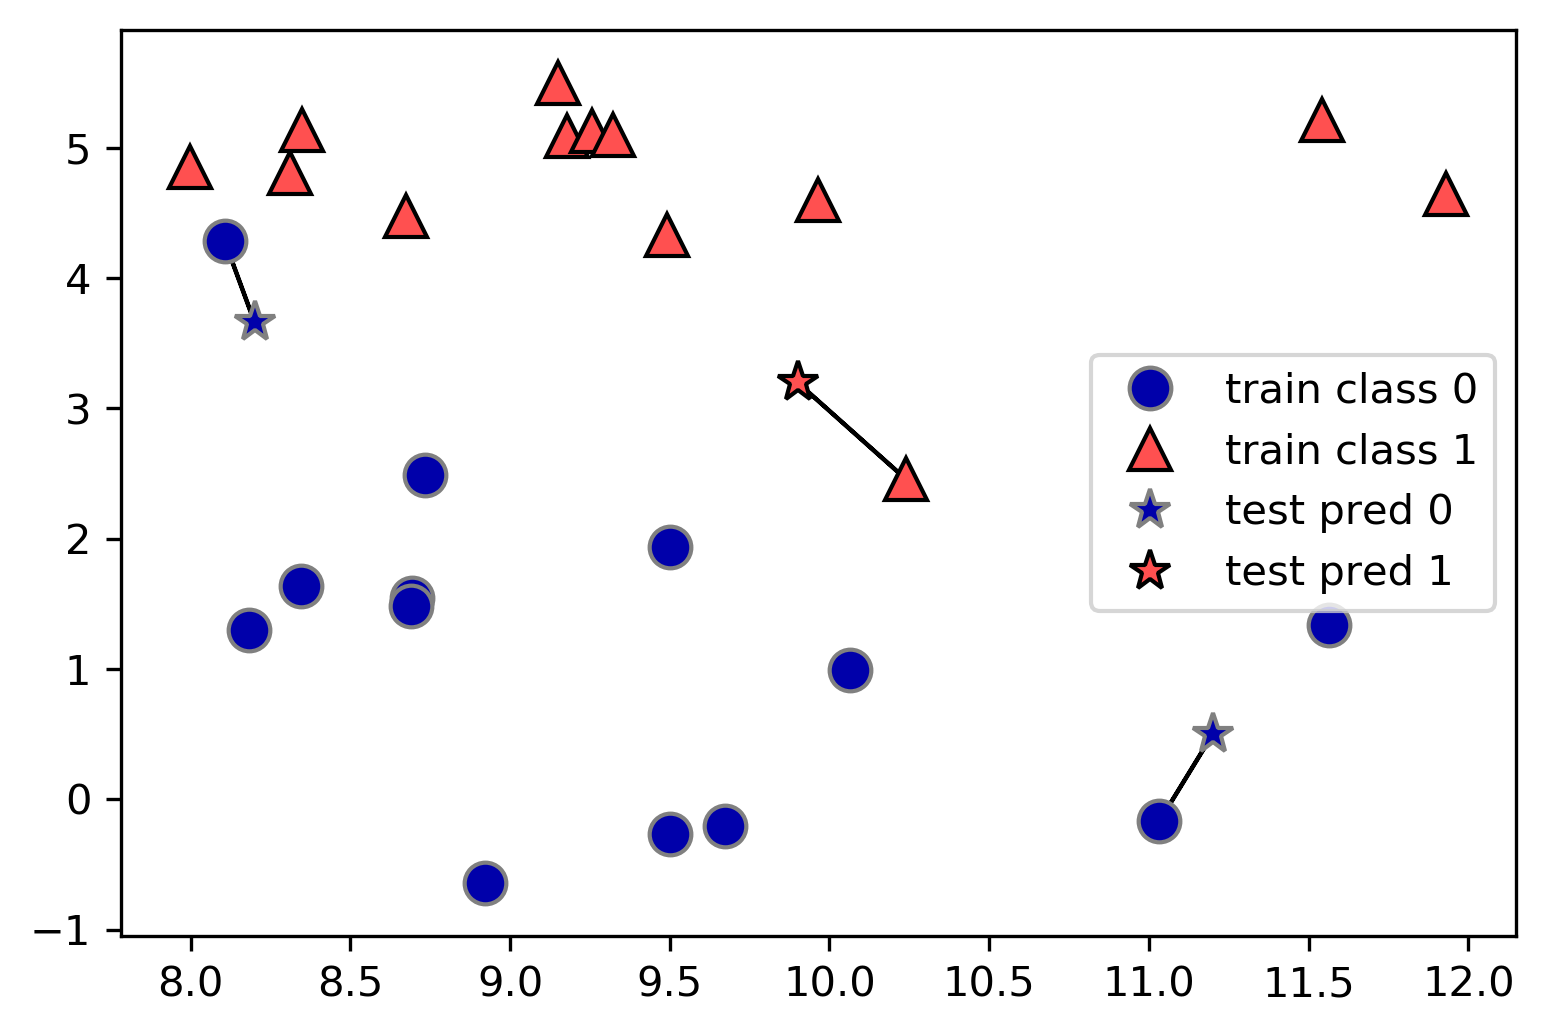

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors = 1) # n_neighbors는 보통 홀수개로 함.

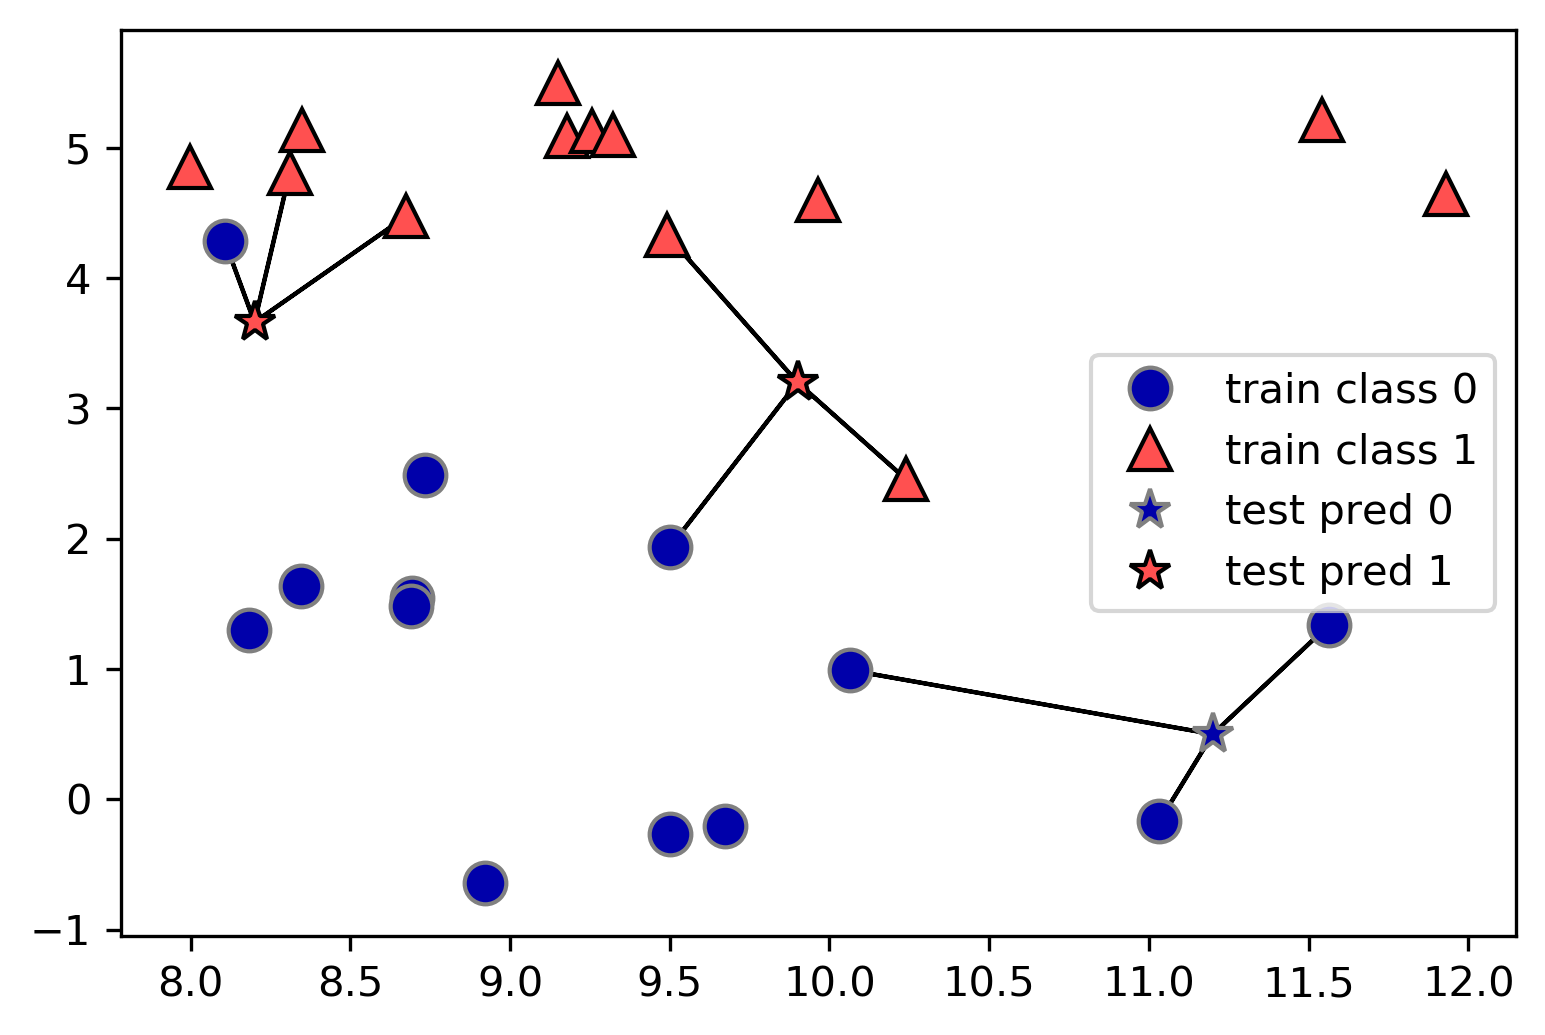

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [19]:
from sklearn.model_selection import train_test_split # train_test_split : training data, test data를 알아서 나누어 줌 (75:25)
X, y = mglearn.datasets.make_forge()

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

print(X_train.shape)
print(X_test.shape)  # 3:2 비율
print(y_train.shape)
print(y_test.shape)

(26, 2)
(26,)
(19, 2)
(7, 2)
(19,)
(7,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [21]:
clf.fit(X_train, y_train)  # fit() : 학습 함수

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
y_pred = clf.predict(X_test)
print("테스트 세트 예측:", y_pred)
print("테스트 세트 참값:", y_test)

# print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 참값: [1 0 1 0 1 1 0]


In [25]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


### KNeighborsClassifier 분석

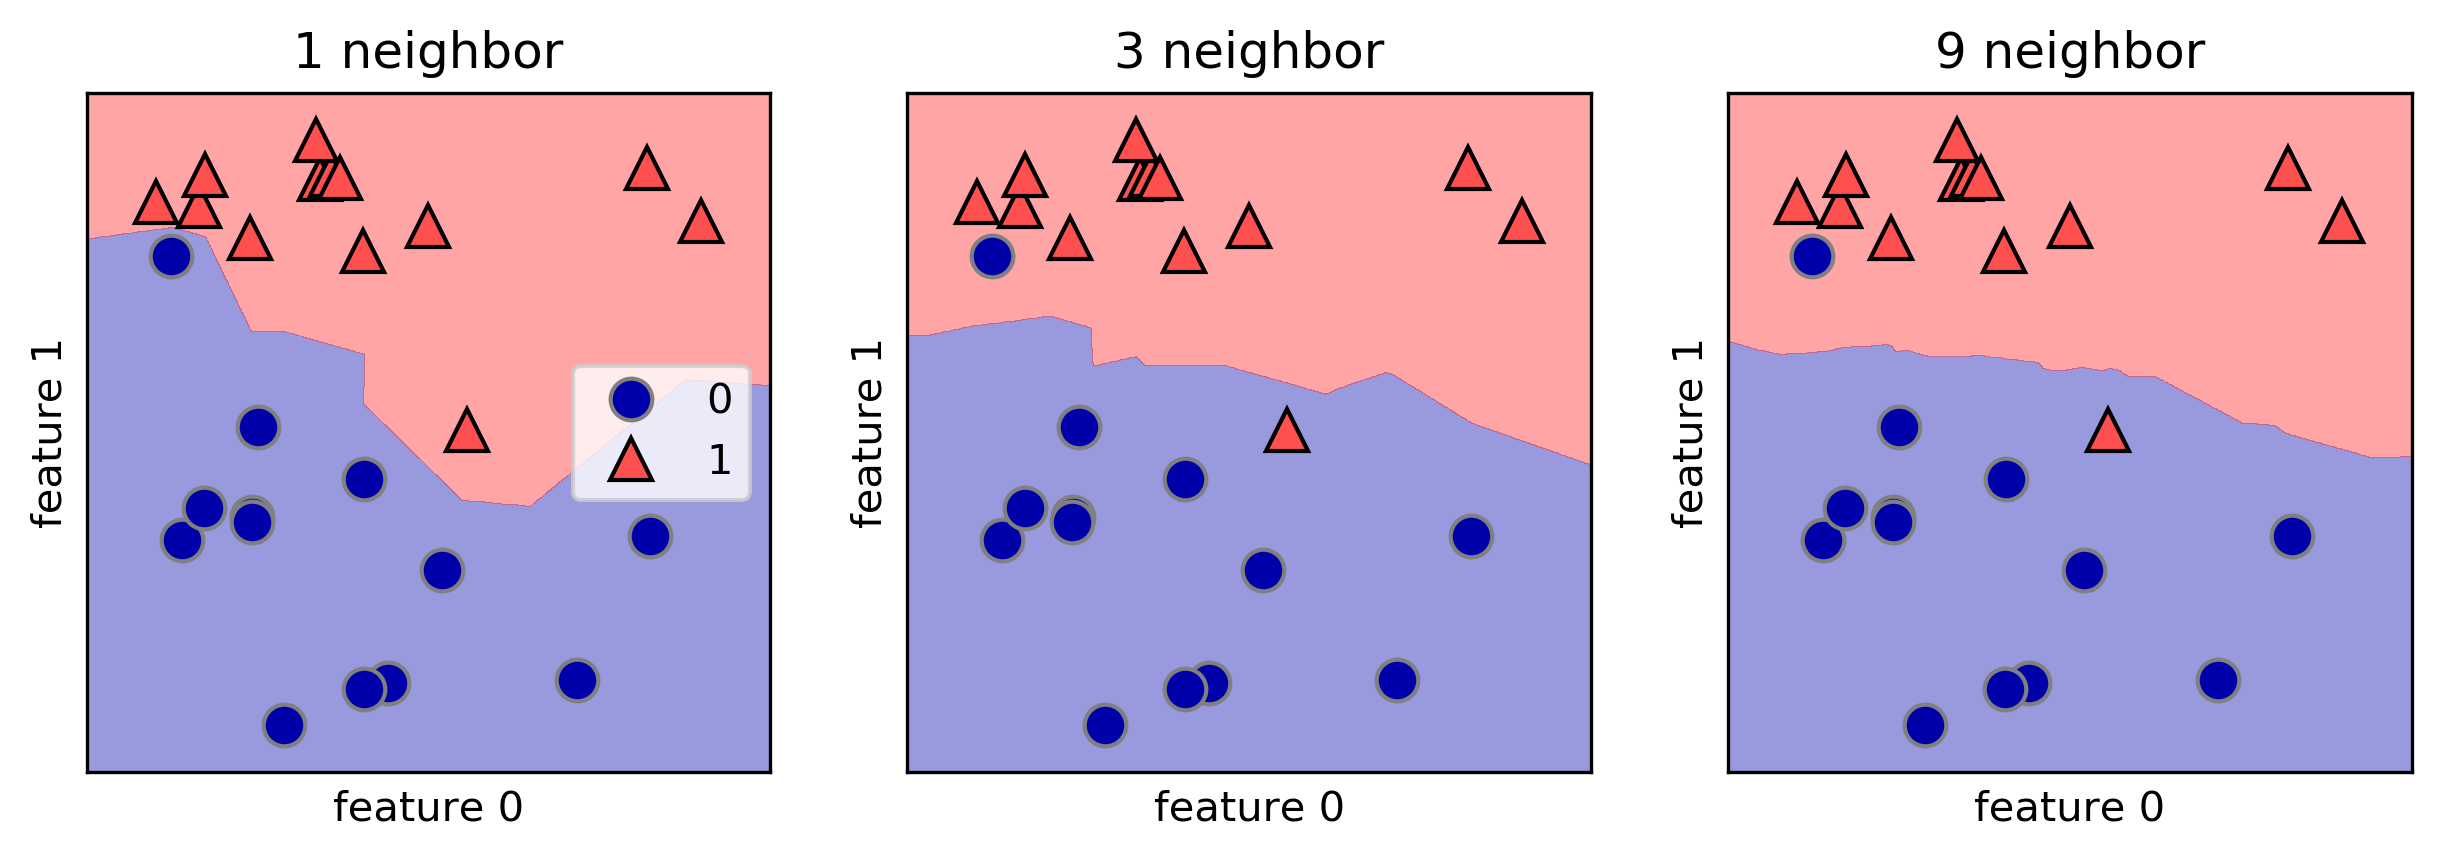

In [28]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다.
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
    clf =  KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc = 'best')

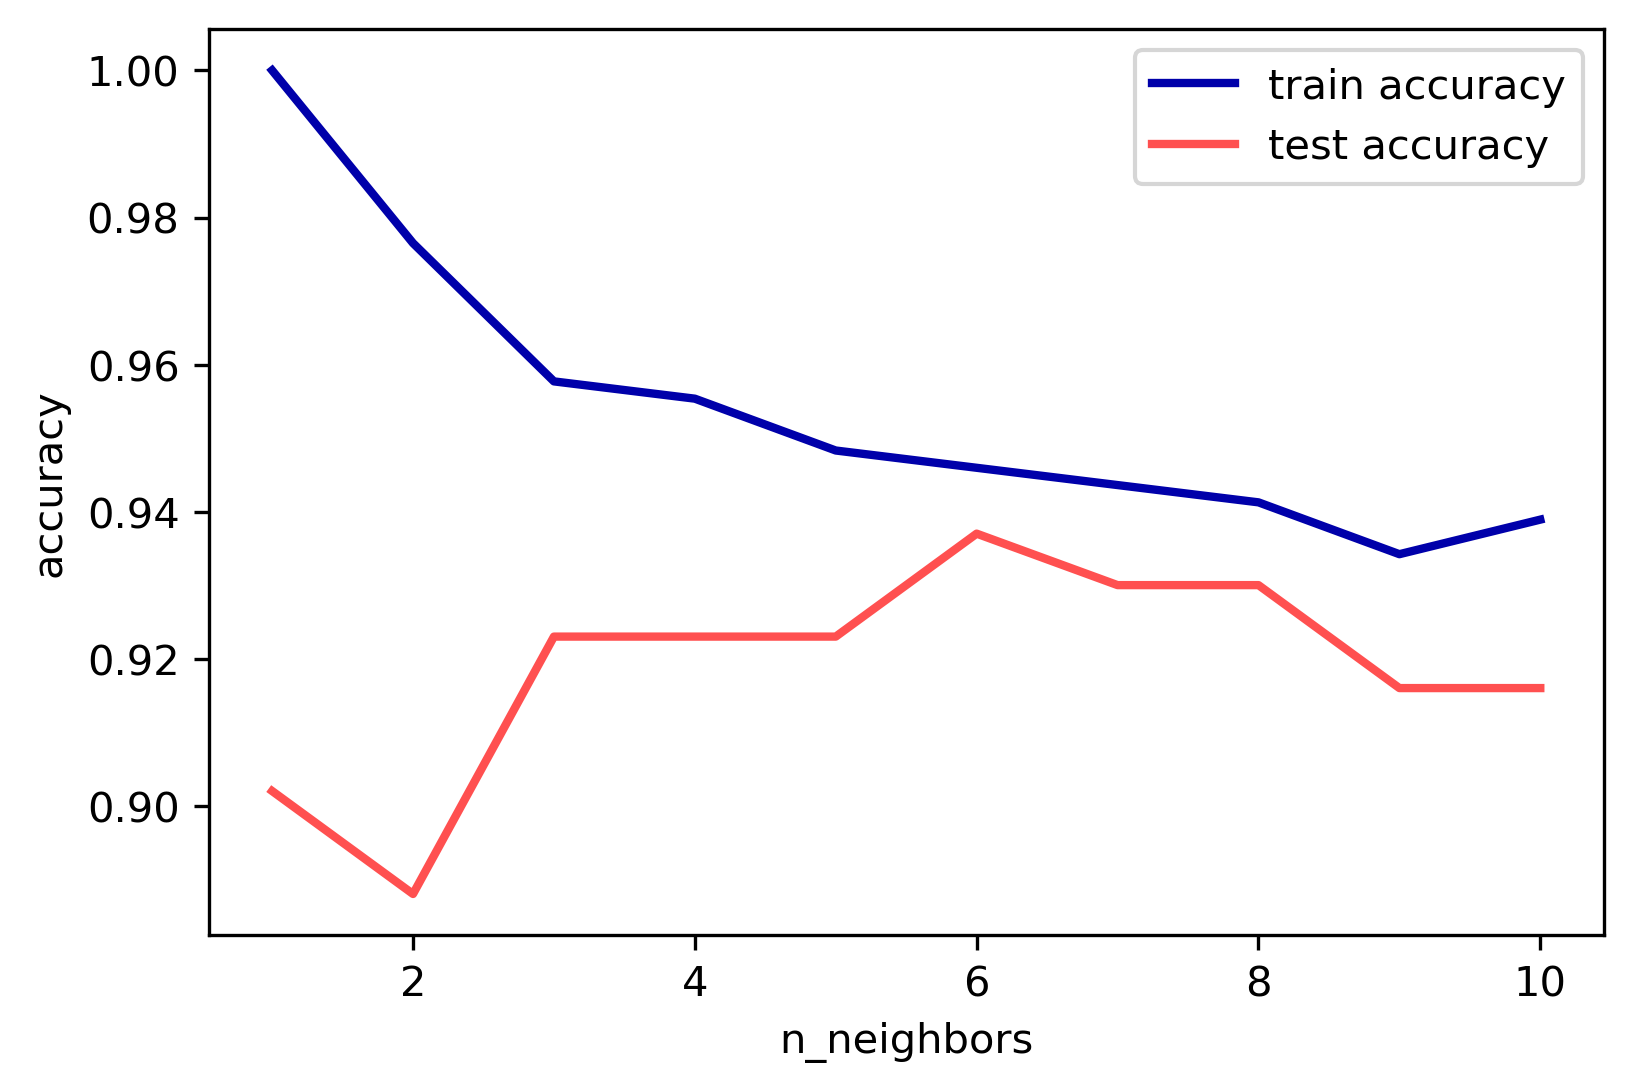

In [34]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)
# = train_test_split(cancer['data'], cancer['target'], stratify = cancer['target'], random_state = 66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = "train accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### K-Neighbors Regression

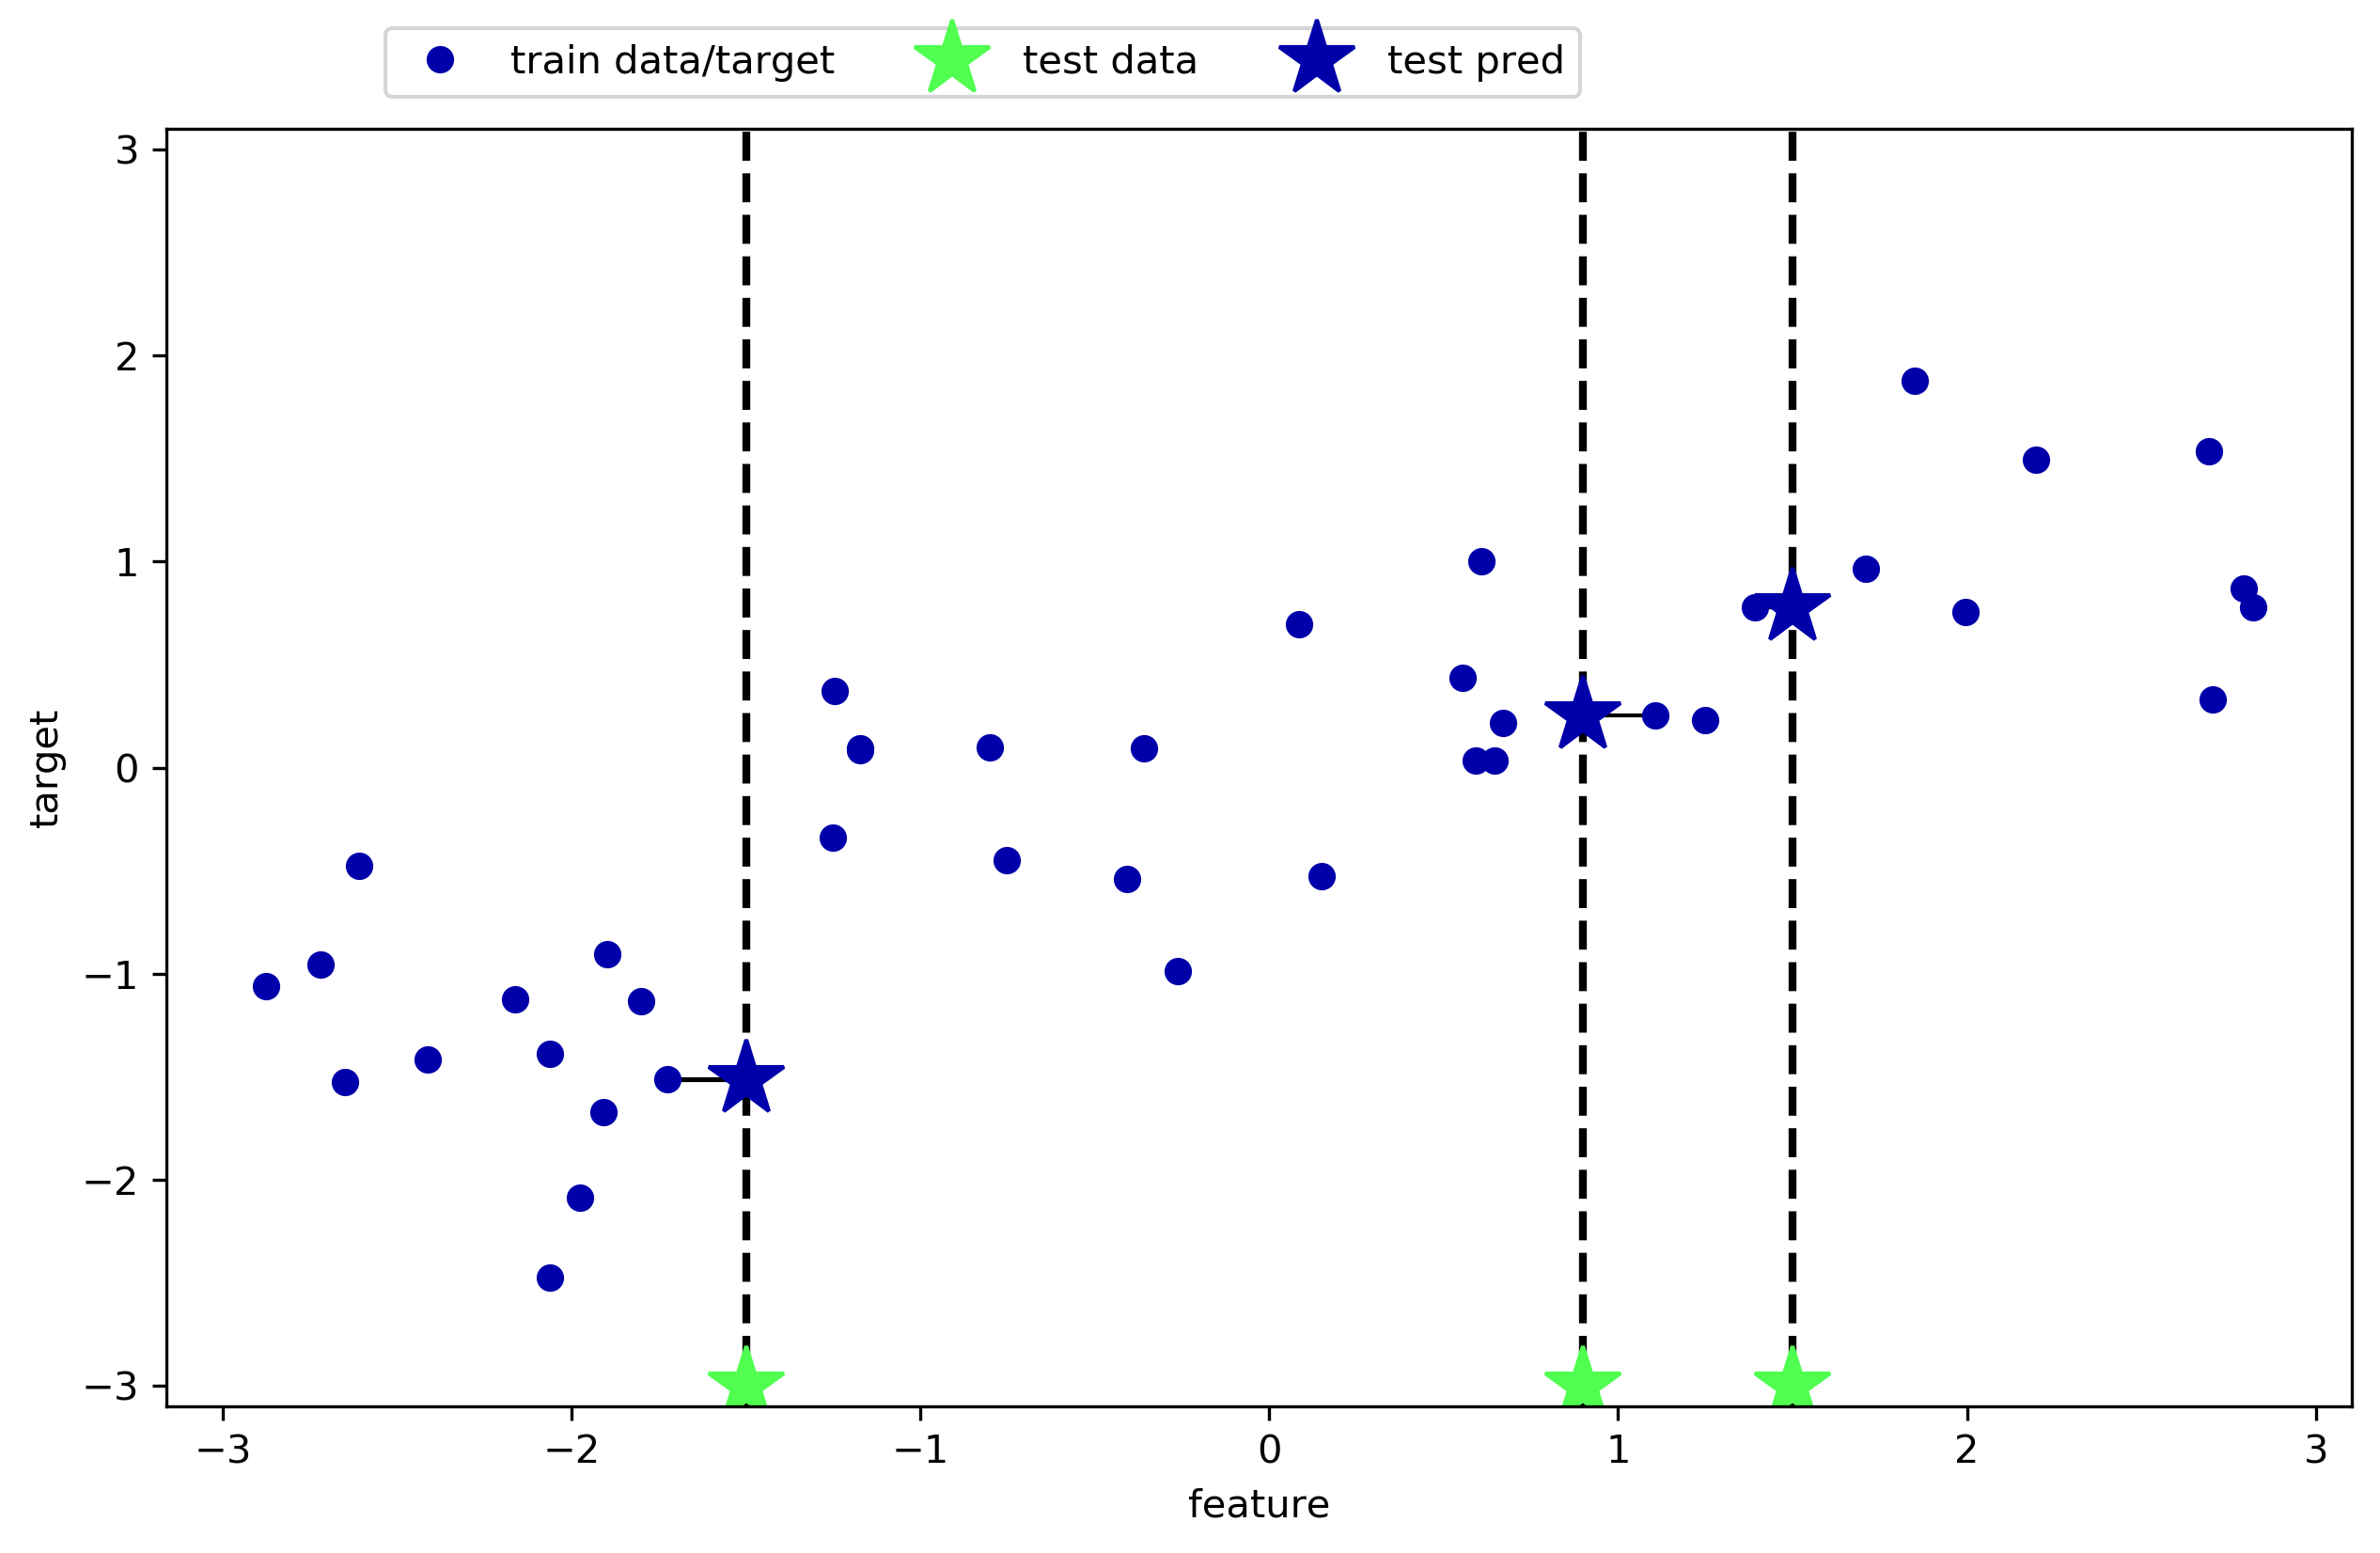

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

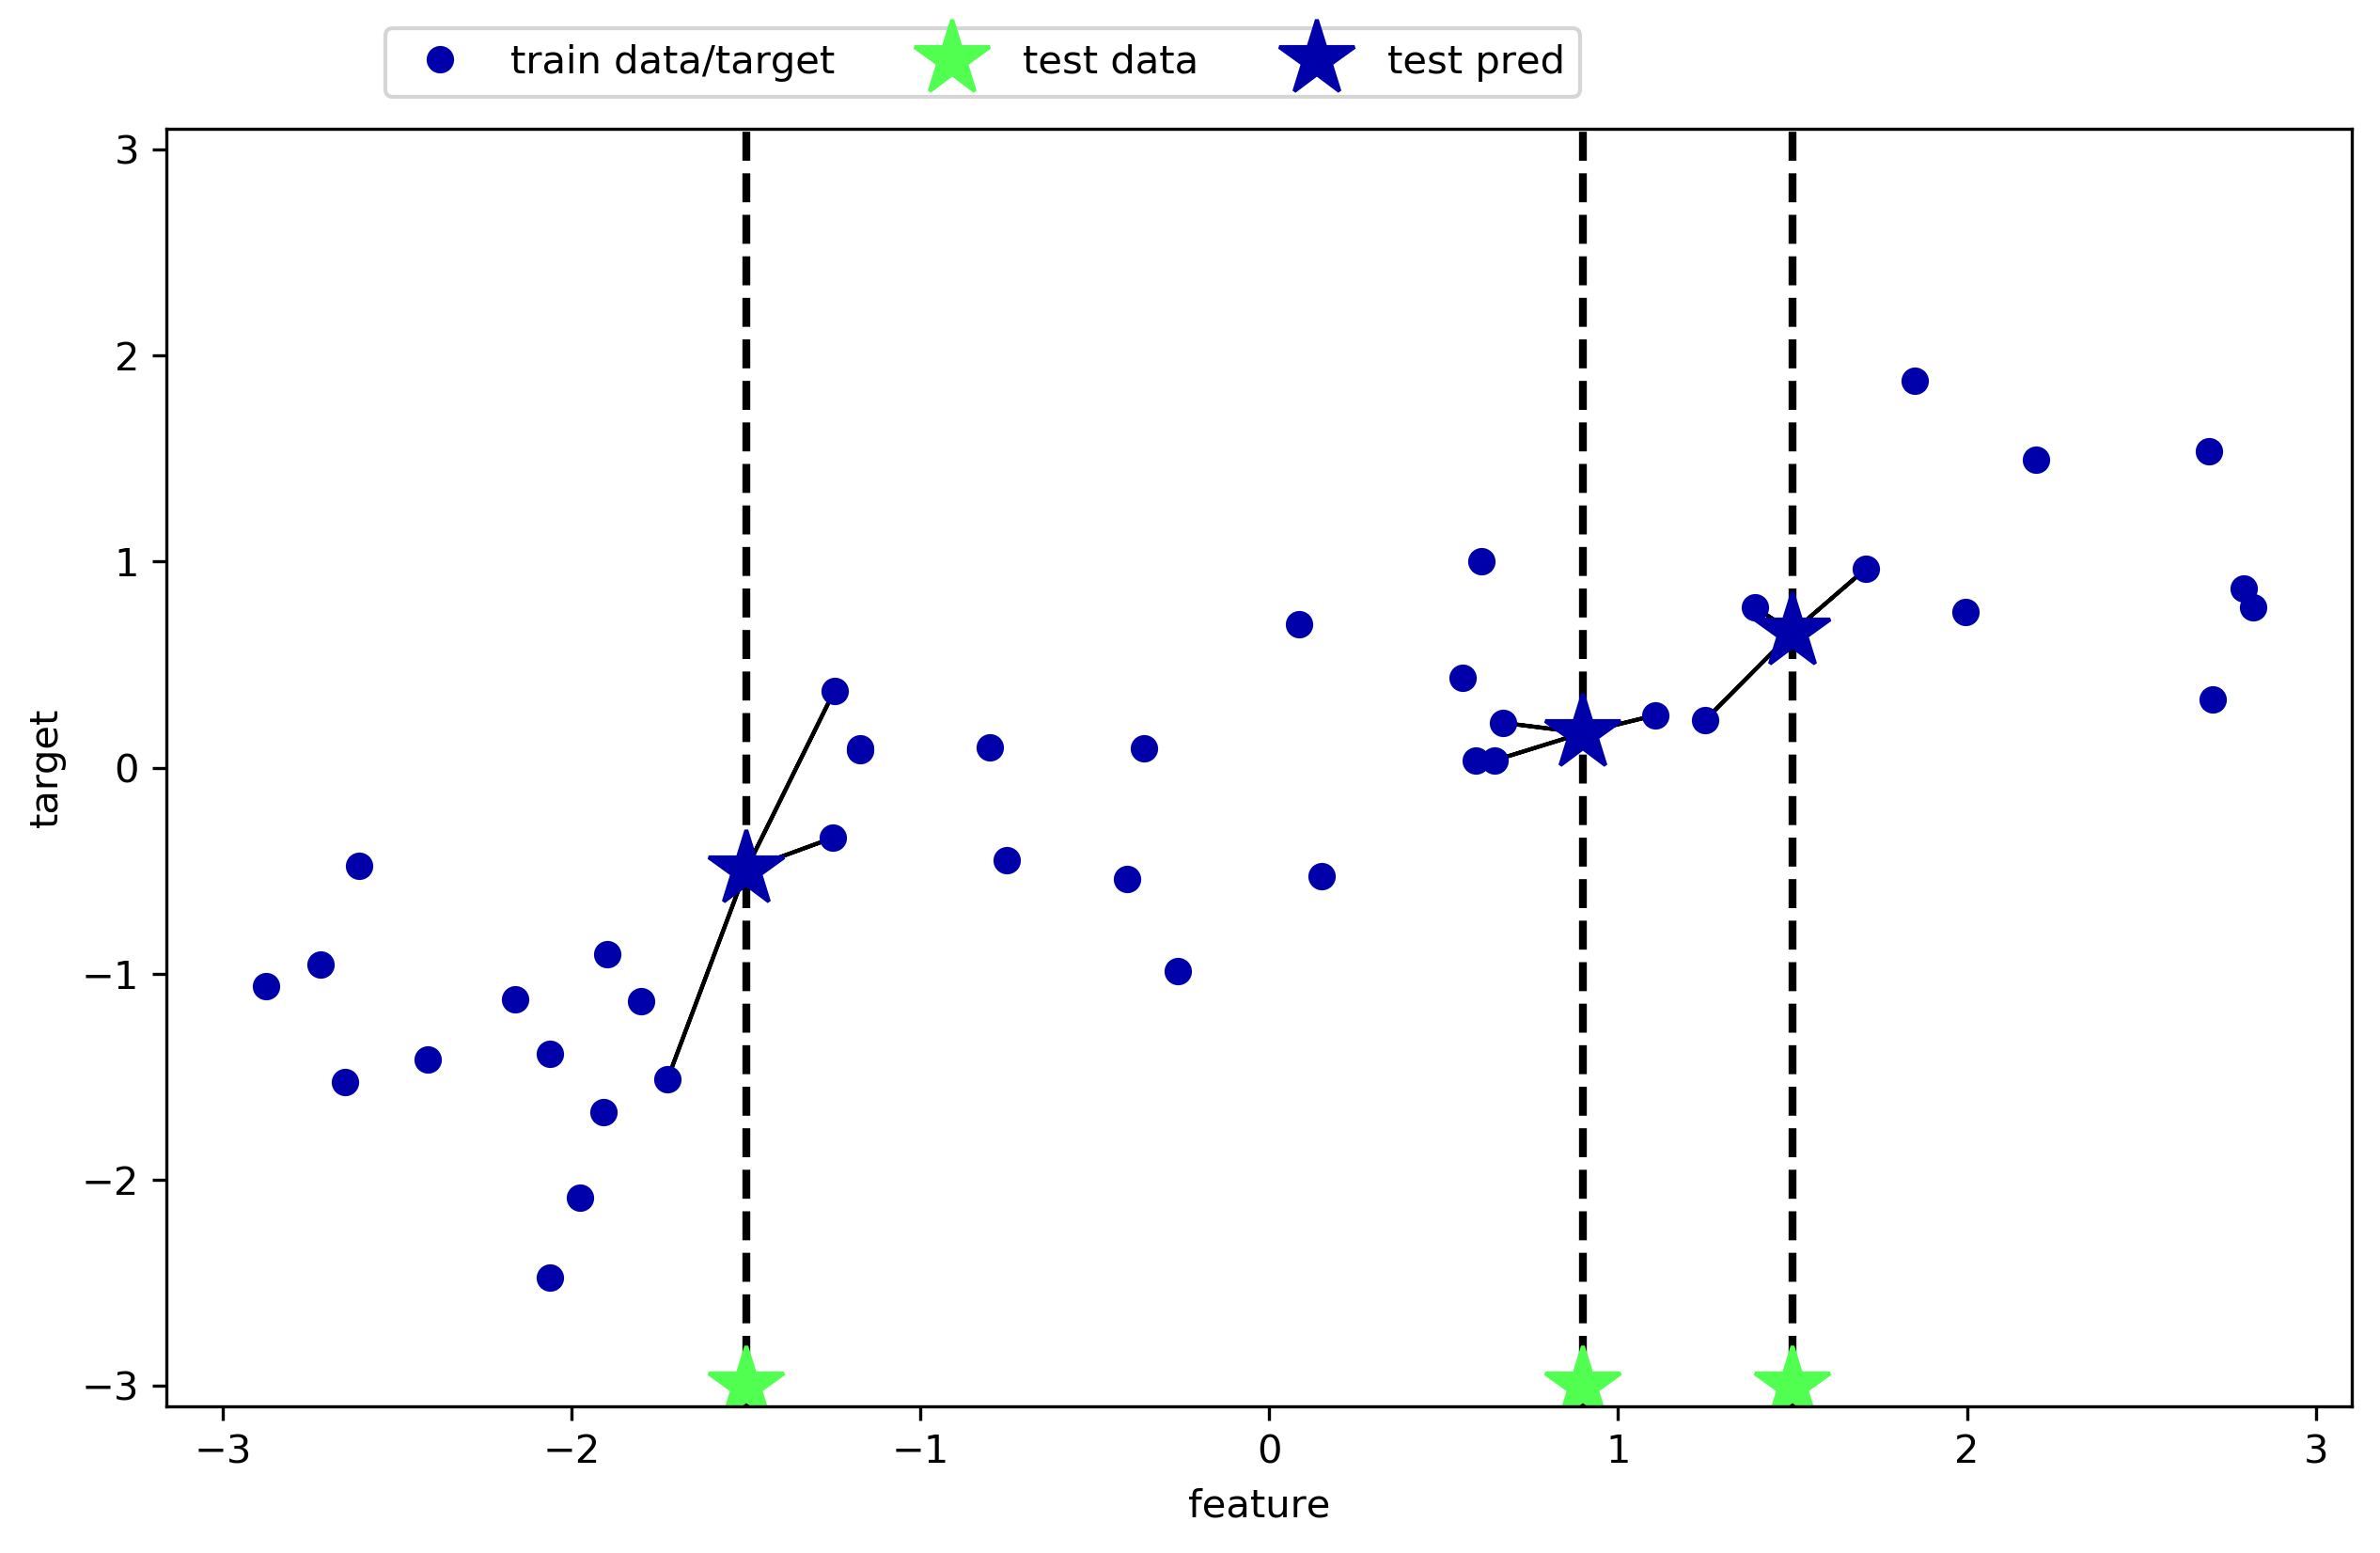

In [36]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [44]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 개수 확인
print(X_train.shape)
print(X_test.shape)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors = 3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

(30, 1)
(10, 1)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [39]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [48]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))  # R^2 : 결정 계수, 1에 가까울수록 예측이 잘 되었다고 판단 가능

테스트 세트 R^2: 0.83


### KNeighborsRegressor 분석

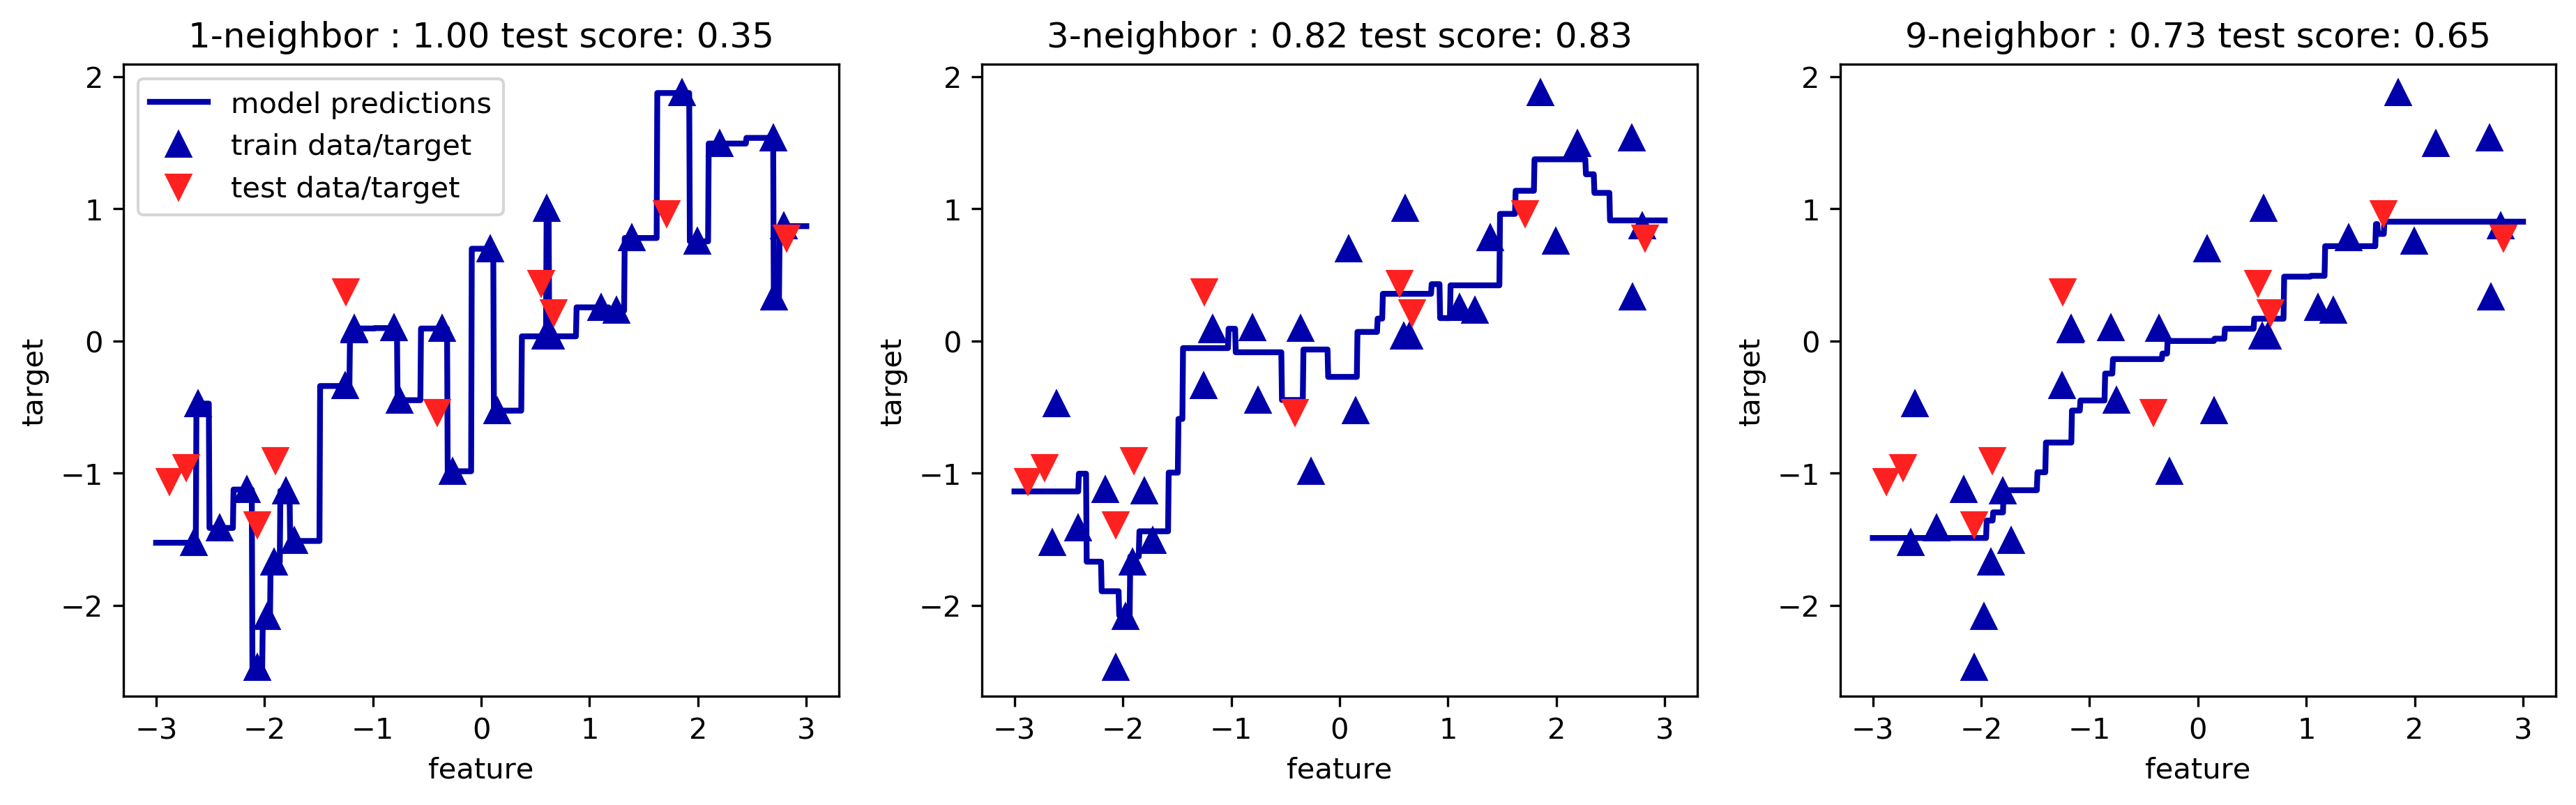

In [52]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

# -3과 3 사이에 1,000개의 데이터 포인트를 만듭니다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    
    # 1, 3, 9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title("{}-neighbor : {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    
axes[0].legend(["model predictions", "train data/target", "test data/target"], loc = 'best')